In [36]:
import sys
sys.path.append("/home/pmitrano/catkin_ws/src/video_prediction/")

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from video_prediction.datasets import base_dataset 
from video_prediction.datasets import softmotion_dataset
import json

np.set_printoptions(suppress=True, precision=4, linewidth=250)

In [38]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
sess= tf.Session(config=config)

In [39]:
input_dir = "/home/pmitrano/catkin_ws/src/video_prediction/data/bair"
dataset_hparams_dict = json.load(open("/home/pmitrano/catkin_ws/src/video_prediction/pretrained_models/bair/ours_savp/dataset_hparams.json", 'r'))
dataset_hparams = 'sequence_length=30'
dataset = softmotion_dataset.SoftmotionVideoDataset(input_dir, mode="test", seed=0, num_epochs=1, hparams_dict=dataset_hparams_dict, hparams=dataset_hparams)

In [40]:
inputs = dataset.make_batch(8)

In [41]:
list(inputs.keys())

['images', 'states', 'actions']

In [42]:
image0 = sess.run(inputs['images'][0])

In [43]:
image0.shape

(30, 64, 64, 3)

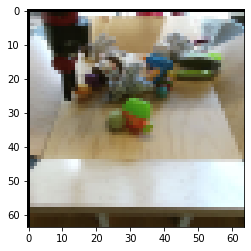

In [8]:
plt.imshow(image0[5])

[[ 0.0386  0.0609  0.      0.    ]
 [ 0.0386  0.0609  0.      0.    ]
 [-0.0327  0.0142  0.      0.    ]
 [-0.0327  0.0142  0.      0.    ]
 [-0.0218  0.0231  0.      0.    ]
 [-0.0218  0.0231  0.      0.    ]
 [-0.0341 -0.0542  0.      0.    ]
 [-0.0341 -0.0542  0.      0.    ]
 [-0.0162 -0.011   0.      0.    ]
 [-0.0162 -0.011   0.      0.    ]
 [-0.0086  0.0407  0.      4.    ]
 [-0.0086  0.0407  0.      4.    ]
 [-0.0564  0.025   0.      0.    ]
 [-0.0564  0.025   0.      0.    ]
 [-0.0555  0.0145  0.      0.    ]
 [-0.0555  0.0145  0.      0.    ]
 [ 0.0543 -0.0157  3.      0.    ]
 [ 0.0543 -0.0157  3.      0.    ]
 [ 0.0162  0.0662  4.      0.    ]
 [ 0.0162  0.0662  4.      0.    ]
 [-0.0254  0.0158  2.      0.    ]
 [-0.0254  0.0158  2.      0.    ]
 [-0.0597 -0.0548  0.      0.    ]
 [-0.0597 -0.0548  0.      0.    ]
 [ 0.0395 -0.0568  0.      0.    ]
 [ 0.0395 -0.0568  0.      0.    ]
 [ 0.0686 -0.0268  1.      0.    ]
 [ 0.0686 -0.0268  1.      0.    ]
 [-0.0459 -0.0192  0

''

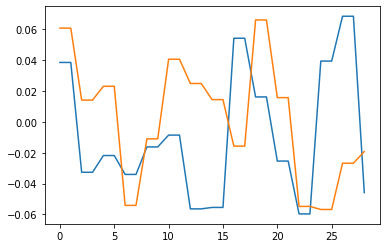

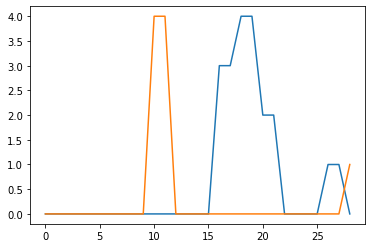

In [34]:
u0 = sess.run(inputs['actions'][0])
print(u0)
plt.figure()
plt.plot(u0[:, 0:2])
plt.figure()
plt.plot(u0[:, 2:4])
;

In [26]:
state0 = sess.run(inputs['states'][0])

In [35]:
dataset.action_like_names_and_shapes

OrderedDict([('actions', ('%d/action', (4,)))])

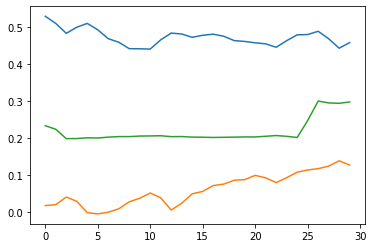

In [10]:
plt.plot(state0);

(0.43525072783231733,
 0.5326896920800209,
 -0.01232763056177646,
 0.14548603075090796)

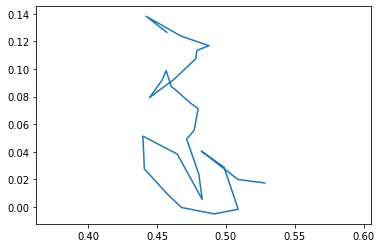

In [11]:
plt.plot(state0[:, 0], state0[:, 1]);
plt.axis("equal")

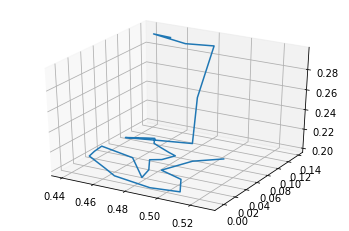

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state0[:,0], state0[:,1], state0[:,2])
plt.show()